# PURPOSE
* The purpose of this notebook is to demonstrate improper sampling.  $x_1$ and $x_2$ are sampled properly and represent their intended population.  $x_3$ was not sampled properly as it was a mix of $x_1$ and $x_2$.  $x_3$ did not capture the intended population.  An ANOVA test was conducted and concluded that $x_1$ and $x_2$ were significantly different, but when they were compared to $x_3$ they were not significantly different.  By design this was intended to illustrate that becase we sampled $x_3$ incorrectly, we have an incorrect conclusion about the differences in groups.
* Brandon Johnson

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

# DATA

In [91]:
N = 50

x1 = np.random.normal(loc=500, scale=40, size=N)

x2 = np.random.normal(loc=450, scale=50, size=N)

index1 = np.random.randint(0,high=N,size=int(N/2))
index2 = np.random.randint(0,high=N,size=int(N/2))

x3 = np.concatenate((x1[index1],x2[index2]))

x1_label = ['x1']*N
x2_label = ['x2']*N
x3_label = ['x3']*N

df1 = pd.DataFrame()
df1['DV'] = np.round(np.concatenate((x1,x2,x3)),2)
df1['Factor'] = np.array([x1_label,x2_label,x3_label]).flatten()
df1.sample(10)

,DV,Factor
95,406.98,x2
10,471.36,x1
141,367.46,x3
2,521.57,x1
126,349.06,x3
88,331.31,x2
71,533.43,x2
102,515.48,x3
51,455.44,x2
17,498.32,x1


# EXAMINING HOW IMPROPER SAMPLING CAN COMBIND DISTRIBUTIONS

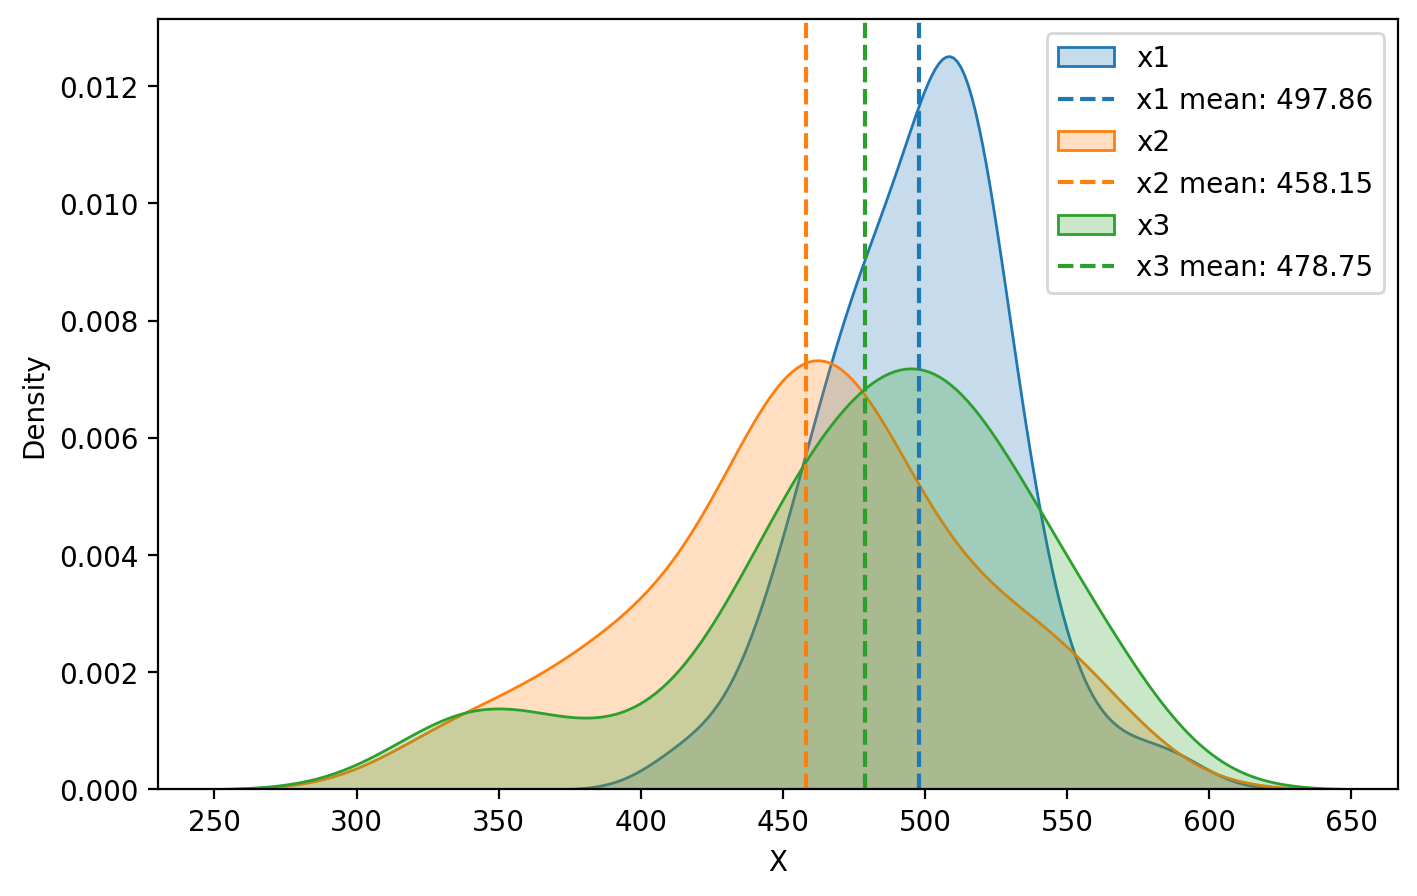

In [92]:
colors = ['tab:blue','tab:orange','tab:green']
plt.figure(figsize=(8,5),dpi=200)
for i,level in enumerate(df1.Factor.unique()):
    values = df1.DV.loc[df1.Factor == level]
    sns.kdeplot(values,fill=True,color=colors[i],label=level)
    mean = values.mean()
    plt.axvline(mean,c=colors[i],ls='--',label=f'{level} mean: {mean:.2f}')
plt.xlabel('X')
plt.legend()
plt.show()

# ANOVA

In [93]:
pg.anova(data=df1,dv='DV',between='Factor',detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Factor,39443.567305,2,19721.783653,7.679541,0.000673,0.094599
1,Within,377509.813394,147,2568.093969,NaN,NaN,NaN


In [94]:
pg.pairwise_gameshowell(data=df1,dv='DV',between='Factor',)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,x1,x2,497.8594,458.1480,39.7114,9.152326,4.338941,77.284701,0.000126,0.861130
1,x1,x3,497.8594,478.7524,19.1070,9.514173,2.008267,75.004050,0.117221,0.398572
2,x2,x3,458.1480,478.7524,-20.6044,11.570943,-1.780702,97.751216,0.181414,-0.353408
